### **1 .Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import xgboost
import lime 
import shap
import plotly.io as pio
import lime.lime_tabular
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline
sns.set_style('darkgrid')

### **2. Loading and Reading the dataset**

In [2]:
df = pd.read_csv('datasets/loan_approval_dataset.csv')

In [3]:
df.columns = df.columns.str.strip()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### **3. Exploratory Data Analysis and Preprocessing**

In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

* Looks like there are **no missing values** in this dataset.

In [8]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [9]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

#### **A. Deciding which variables/features to keep**

In [10]:
df = df.drop(columns=['loan_id'])

#### **B. Handling Outliers**

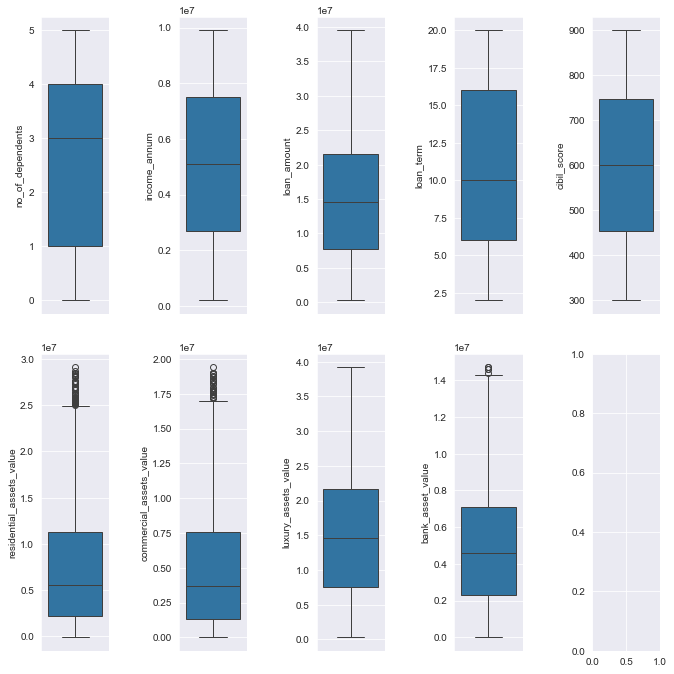

In [11]:
fig, axes = plt.subplots(2,5, figsize = (10,10))
  
sns.boxplot(y=df.no_of_dependents , ax=axes[0][0])
sns.boxplot(y=df.income_annum , ax=axes[0][1])
sns.boxplot(y=df.loan_amount , ax=axes[0][2])
sns.boxplot(y=df.loan_term , ax=axes[0][3])
sns.boxplot(y=df.cibil_score , ax=axes[0][4])
sns.boxplot(y=df.residential_assets_value , ax=axes[1][0])
sns.boxplot(y=df.commercial_assets_value , ax=axes[1][1])
sns.boxplot(y=df.luxury_assets_value , ax=axes[1][2])
sns.boxplot(y=df.bank_asset_value , ax=axes[1][3])

plt.tight_layout(pad = 3)

#### **C. Converting Categorical Variables to Continuous Variables**

In [12]:
# Remove leading/trailing spaces from the categorical column values
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

# Encode categorical variables
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

#### **D. Finding Correlations**

Text(0.5, 1.0, 'Heatmap of Correlations')

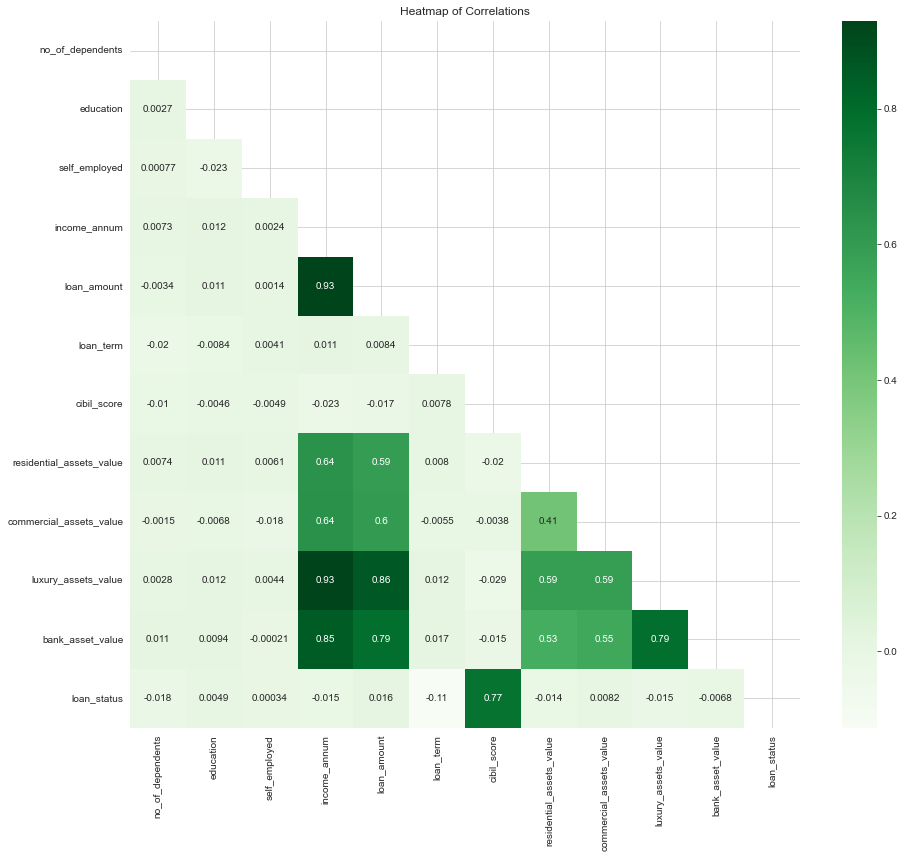

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,13))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), cmap = 'Greens', annot = True, mask=matrix)
plt.title('Heatmap of Correlations') 

### **4. Splitting the dataset into training and test sets**

In [14]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [15]:
print(x)

[[       2        1        0 ... 17600000 22700000  8000000]
 [       0        0        1 ...  2200000  8800000  3300000]
 [       3        1        0 ...  4500000 33300000 12800000]
 ...
 [       2        0        0 ... 12400000 18100000  7300000]
 [       1        0        0 ...   700000 14100000  5800000]
 [       1        1        0 ... 11800000 35700000 12000000]]


In [16]:
print(y)

[1 0 0 ... 0 1 1]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=42)

In [18]:
print(X_train)

[[       5        1        1 ...  4300000 23800000  4700000]
 [       0        0        0 ...  6500000 17700000  7100000]
 [       2        0        1 ...  8700000 26000000 10700000]
 ...
 [       4        0        1 ... 10600000 28700000  5400000]
 [       2        0        1 ...  1300000 19800000  9600000]
 [       4        1        0 ...  3700000 24700000  4600000]]


In [19]:
print(X_test)

[[       5        1        0 ... 10000000 15700000  7300000]
 [       2        1        0 ...  9500000 17800000  6700000]
 [       3        1        0 ... 16200000 28500000  6600000]
 ...
 [       2        1        1 ...  6700000 17000000  4500000]
 [       5        0        1 ...   600000 12100000  3500000]
 [       5        0        0 ...  3100000  6600000  2600000]]


In [20]:
print(y_train)

[0 0 1 ... 0 0 1]


In [21]:
print(y_test)

[0 1 0 ... 1 0 0]


from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

print(X_train)

print(X_test)

### **5. Training Machine Learning models**

**Deciding Evaluation Metrics**

#### **A. Logistic Regression**

In [22]:
%%time
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(n_jobs=-1, solver='saga', random_state=50)
logistic_model.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 70.7 ms


C:\Users\aseem\anaconda3\envs\ll\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(n_jobs=-1, random_state=50, solver='saga')

Logistic Regression Model:	
 
Accuracy:	 63.48314606741573 
Precision:	 63.61058601134215 
Recall: 	 99.26253687315634 
F1-Score: 	 77.53456221198157


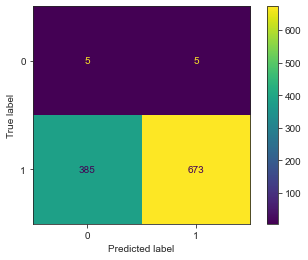

In [23]:
y_pred = logistic_model.predict(X_test)

sns.set_style("ticks")
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

print('Logistic Regression Model:\t\n',
      '\nAccuracy:\t',accuracy_score(y_test, y_pred)*100,
      '\nPrecision:\t',precision_score(y_test, y_pred)*100,
      '\nRecall: \t',recall_score(y_test, y_pred)*100,
      '\nF1-Score: \t',f1_score(y_test, y_pred)*100,)

#### **B. Decision Trees**

In [24]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=50)
dt_model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 7.56 ms


DecisionTreeClassifier(random_state=50)

Decision Tree Model:	
 
Accuracy:	 98.31460674157303 
Precision:	 98.67256637168141 
Recall: 	 98.67256637168141 
F1-Score: 	 98.67256637168141


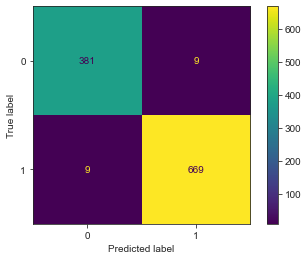

In [25]:
y_pred = dt_model.predict(X_test)

sns.set_style("ticks")
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

print('Decision Tree Model:\t\n',
      '\nAccuracy:\t',accuracy_score(y_test, y_pred)*100,
      '\nPrecision:\t',precision_score(y_test, y_pred)*100,
      '\nRecall: \t',recall_score(y_test, y_pred)*100,
      '\nF1-Score: \t',f1_score(y_test, y_pred)*100,)

#### **C. Random Forests**

In [26]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_jobs=-1, random_state=50)
rf_model.fit(X_train, y_train)

CPU times: total: 391 ms
Wall time: 183 ms


RandomForestClassifier(n_jobs=-1, random_state=50)

Random Forest Model:	
 
Accuracy:	 98.22097378277154 
Precision:	 97.82293178519593 
Recall: 	 99.41002949852508 
F1-Score: 	 98.6100950987564


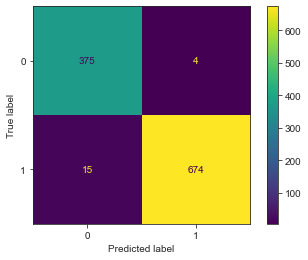

In [27]:
y_pred = rf_model.predict(X_test)

sns.set_style("ticks")
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

print('Random Forest Model:\t\n',
      '\nAccuracy:\t',accuracy_score(y_test, y_pred)*100,
      '\nPrecision:\t',precision_score(y_test, y_pred)*100,
      '\nRecall: \t',recall_score(y_test, y_pred)*100,
      '\nF1-Score: \t',f1_score(y_test, y_pred)*100,)

#### **D. XG Boost**

In [28]:
%%time
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_jobs=-1, n_estimators=24, max_depth=3, random_state=50)
xgb_model.fit(X_train, y_train)

CPU times: total: 219 ms
Wall time: 116 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=24, n_jobs=-1,
              num_parallel_tree=None, random_state=50, ...)

XG Boost Model:	
 
Accuracy:	 97.75280898876404 
Precision:	 97.25433526011561 
Recall: 	 99.26253687315634 
F1-Score: 	 98.24817518248176


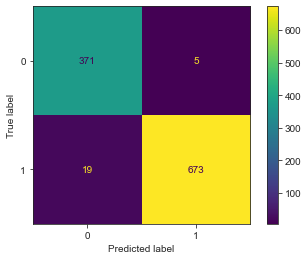

In [29]:
y_pred = xgb_model.predict(X_test)

sns.set_style("ticks")
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

print('XG Boost Model:\t\n',
      '\nAccuracy:\t',accuracy_score(y_test, y_pred)*100,
      '\nPrecision:\t',precision_score(y_test, y_pred)*100,
      '\nRecall: \t',recall_score(y_test, y_pred)*100,
      '\nF1-Score: \t',f1_score(y_test, y_pred)*100,)

### **6. Saving the models**

In [31]:
models = {"Random Forest": rf_model,
          "Logistic Regression": logistic_model,  
          "Decision Tree": dt_model,
          "XG Boost": xgb_model
         }

# Save all models
joblib.dump(models, "datasets/loan_models.pkl")
print("All models saved!")

All models saved!


In [35]:
# Load all models
loaded_models = joblib.load("datasets/loan_models.pkl")

# Access individual models
random_forest = loaded_models["Random Forest"]
logistic_regression = loaded_models["Logistic Regression"]

### **7. Single Prediction Interpretation using LIME**

True label: Approved


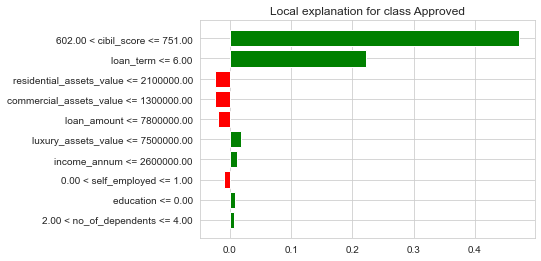

In [36]:
sns.set_style('whitegrid')
target = ['Rejected', 'Approved']
labels = {'0': 'Rejected', '1': 'Approved'}
sample = np.random.randint(0, X_test.shape[0])

# Create the explainer object with a model 
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=list(df.columns),
    class_names=target,
    discretize_continuous=True,
    )

# Explain the prediction instance using LIME
exp = explainer.explain_instance(
    X_test[sample],
    dt_model.predict_proba,
    # num_features=6,
    # top_labels=1
    )

# Visualize the explanation
fig = exp.show_in_notebook(show_table=True, show_all=True)
print('True label:', labels[str(y_test[sample])])

fig = exp.as_pyplot_figure()
plt.savefig("test.jpg")

In [37]:
exp.save_to_file('lime_explanation.html')

### **7. Full model Interpretation using SHAP**

In [50]:
# Setting up data for shap
shap.initjs()
pio.renderers.default = 'colab'
X = df.drop(columns=["loan_status"]).copy()
X = X.astype(float)

# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

In [51]:
sample = np.random.randint(0, X_test.shape[0])
shap.force_plot(explainer.expected_value, shap_values[sample, :], X.iloc[sample, :])

In [52]:
shap.force_plot(explainer.expected_value, shap_values[:1000, :], X.iloc[:1000, :])

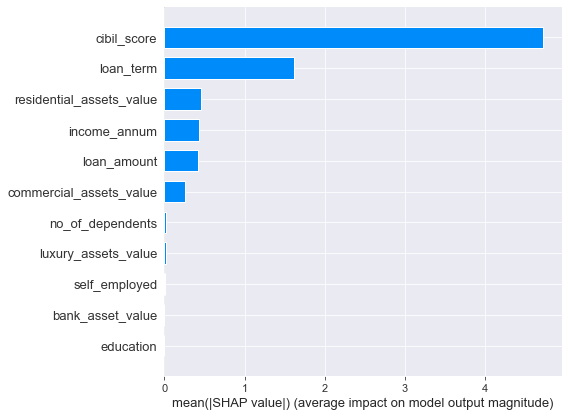

In [54]:
shap.summary_plot(shap_values, X, plot_type="bar")

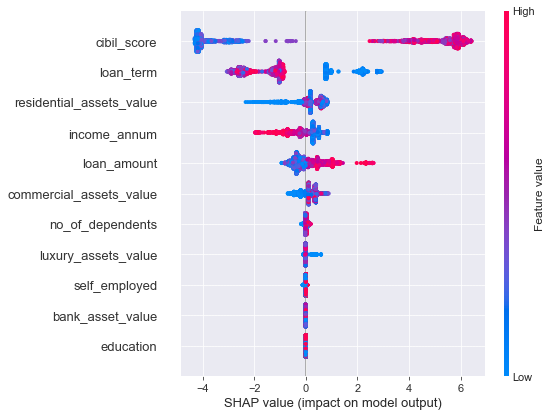

In [55]:
shap.summary_plot(shap_values, X)

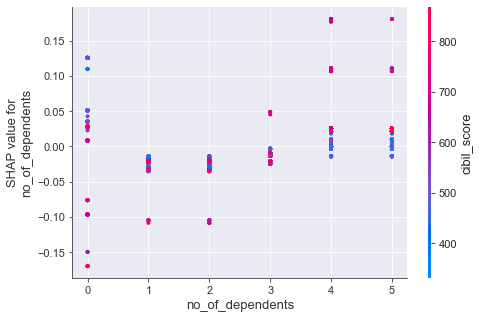

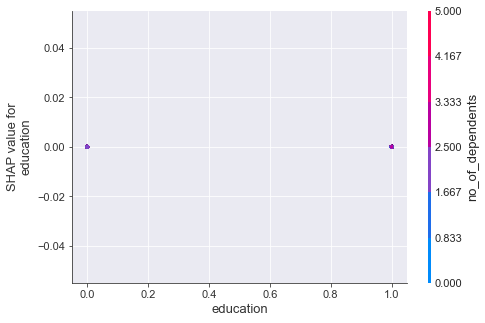

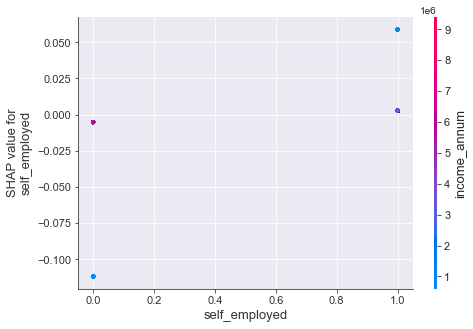

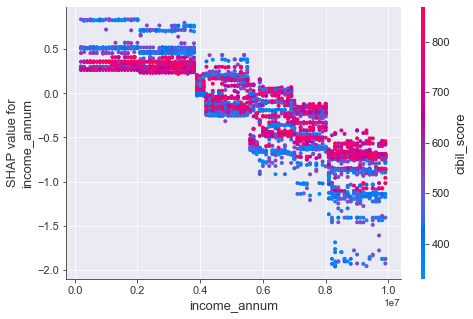

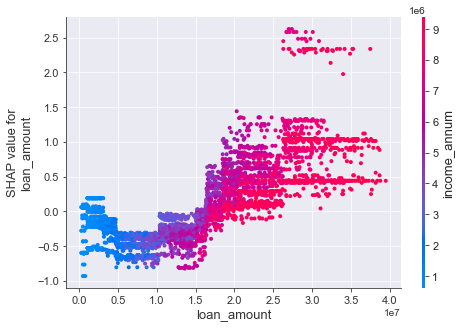

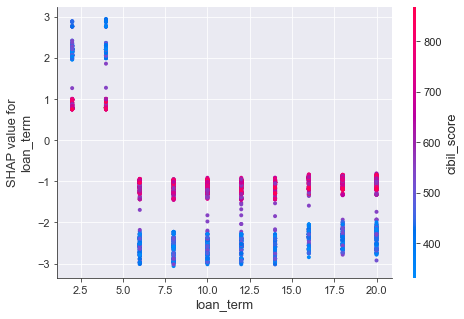

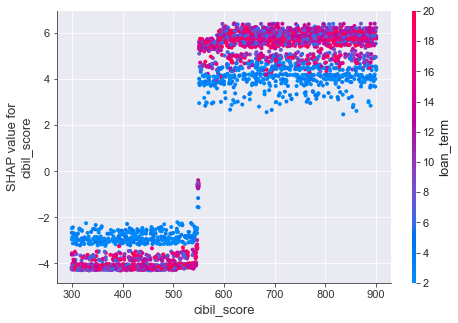

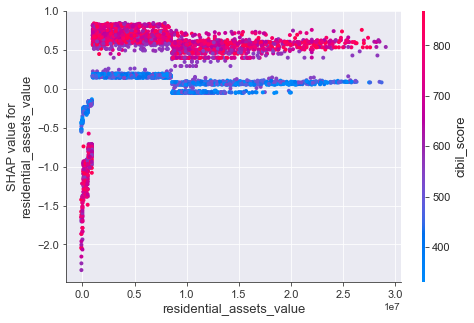

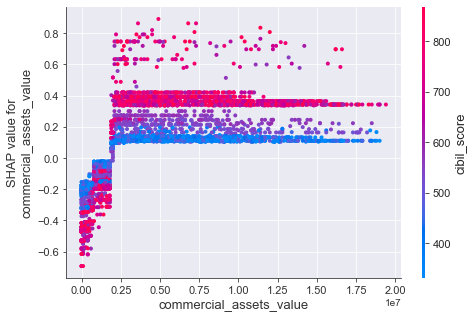

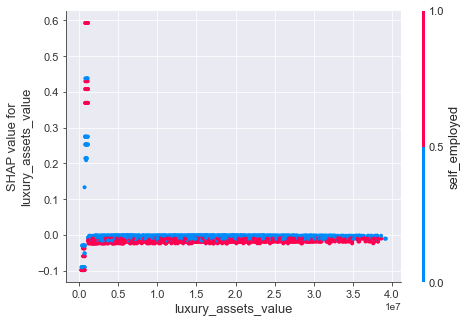

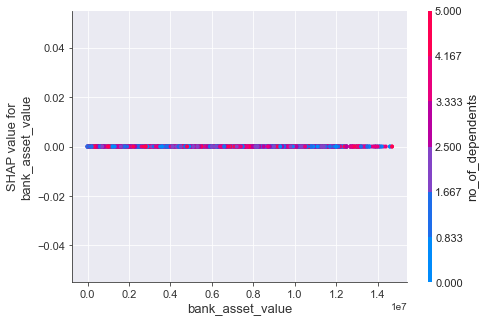

In [56]:
for name in X.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

### **Feature Importances (Optional)**

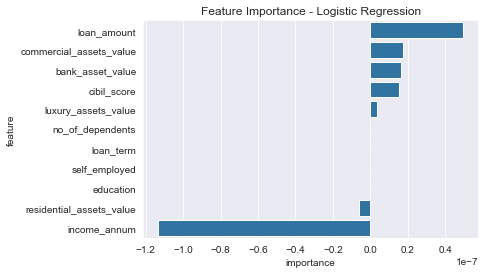

In [57]:
sns.set_style("darkgrid")
importance_df = pd.DataFrame({'feature': df.columns[:-1],
                              'importance': logistic_model.coef_[0]}).sort_values('importance', ascending=False)

plt.title('Feature Importance - Logistic Regression')
sns.barplot(data=importance_df, x='importance', y='feature');

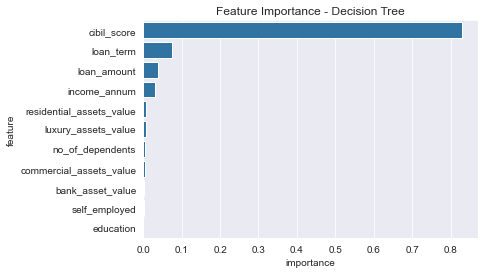

In [58]:
sns.set_style("darkgrid")
importance_df = pd.DataFrame({'feature':  df.columns[:-1],
                              'importance': dt_model.feature_importances_}).sort_values('importance', ascending=False)

plt.title('Feature Importance - Decision Tree')
sns.barplot(data=importance_df, x='importance', y='feature');

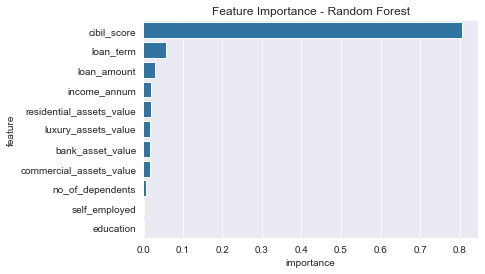

In [59]:
sns.set_style("darkgrid")
importance_df = pd.DataFrame({'feature': df.columns[:-1],
                              'importance': rf_model.feature_importances_}).sort_values('importance', ascending=False)

plt.title('Feature Importance - Random Forest')
sns.barplot(data=importance_df, x='importance', y='feature');

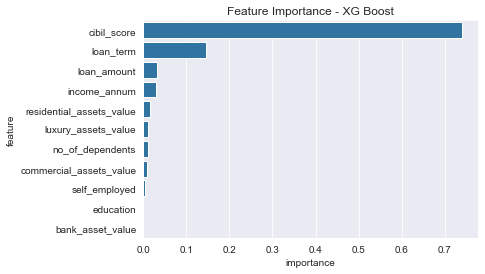

In [60]:
sns.set_style("darkgrid")
importance_df = pd.DataFrame({'feature': df.columns[:-1],
                              'importance': xgb_model.feature_importances_}).sort_values('importance', ascending=False)

plt.title('Feature Importance - XG Boost')
sns.barplot(data=importance_df, x='importance', y='feature');